## Explory Data Analysis (EDA) for Group Project

### STAT 3612 

#### Learning Outcomes:
- Become familiar with the group project workflow
- Develop overall understanding of the project dataset
- Perform basic EDA skills

##### 1. Importing the required libraries for EDA.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

##### 2. Loading the data into the data frame.

In [2]:
# TODO: change this to yours ...
DATA_DIR = "./"

# read 3 csv files and 1 pkl file
train_csv_file = os.path.join(DATA_DIR, "train.csv")
val_csv_file = os.path.join(DATA_DIR, "valid.csv")
test_csv_file = os.path.join(DATA_DIR, "test.csv")
ehr_pkl_file = os.path.join(DATA_DIR, "ehr_preprocessed_seq_by_day_cat_embedding.pkl")

train_df = pd.read_csv(train_csv_file)
val_df = pd.read_csv(val_csv_file)
test_df = pd.read_csv(test_csv_file)

with open(ehr_pkl_file, 'rb') as f:
    ehr_data = pd.read_pickle(f)

#### 3. Check the type and shape of the data

In [3]:
train_df.head()

,id,subject_id,hadm_id,admittime,dischtime,deathtime,dicom_id,study_id,ViewPosition,StudyDate,StudyTime,image_path,readmitted_within_30days
0,10869829_25238191,10869829,25238191,2141-08-20 12:41:00,2141-09-01 13:22:00,NaN,78ab2105-42f58137-487be951-2fb5b70a-f3f76660,53096236,AP,21410828,90151.343,78ab2105-42f58137-487be951-2fb5b70a-f3f76660.jpg,0
1,10869829_25238191,10869829,25238191,2141-08-20 12:41:00,2141-09-01 13:22:00,NaN,64e61e55-13c7ddf7-70e4a8d8-940cec1c-084a6f23,53621244,AP,21410831,130627.031,64e61e55-13c7ddf7-70e4a8d8-940cec1c-084a6f23.jpg,0
2,10869829_25238191,10869829,25238191,2141-08-20 12:41:00,2141-09-01 13:22:00,NaN,cc0d53de-4a394a45-dde65f7c-b022a912-5c0d3e5c,56056422,AP,21410821,80228.937,cc0d53de-4a394a45-dde65f7c-b022a912-5c0d3e5c.jpg,0
3,17910612_22301530,17910612,22301530,2188-03-04 19:49:00,2188-04-19 00:00:00,2188-04-19 00:00:00,3407247f-bee23734-8593cc17-b5806e0f-04ddc762,50646505,AP,21880405,200636.062,3407247f-bee23734-8593cc17-b5806e0f-04ddc762.jpg,1
4,17910612_22301530,17910612,22301530,2188-03-04 19:49:00,2188-04-19 00:00:00,2188-04-19 00:00:00,36d0a0dc-8442b96f-efa8b4f2-c3618f4c-a311caac,50709541,AP,21880321,114135.046,36d0a0dc-8442b96f-efa8b4f2-c3618f4c-a311caac.jpg,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55941 entries, 0 to 55940
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        55941 non-null  object 
 1   subject_id                55941 non-null  int64  
 2   hadm_id                   55941 non-null  int64  
 3   admittime                 55941 non-null  object 
 4   dischtime                 55941 non-null  object 
 5   deathtime                 8281 non-null   object 
 6   dicom_id                  55941 non-null  object 
 7   study_id                  55941 non-null  int64  
 8   ViewPosition              55941 non-null  object 
 9   StudyDate                 55941 non-null  int64  
 10  StudyTime                 55941 non-null  float64
 11  image_path                55941 non-null  object 
 12  readmitted_within_30days  55941 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 5.5+ MB


In [5]:
n_patient = len(train_df["subject_id"].unique())
n_admission = len(train_df["hadm_id"].unique())
print(f"The unique number of subjects: {n_patient}")
print(f"The unique number of admissions: {n_admission}")
print(f"Average number of admissions per patient: {n_admission/n_patient}")

The unique number of subjects: 7464
The unique number of admissions: 9271
Average number of admissions per patient: 1.2420953912111468


In [6]:
# train_df.drop_duplicates(subset=["id"], keep="first")["readmitted_within_30days"].value_counts()

<Axes: xlabel='readmitted_within_30days'>

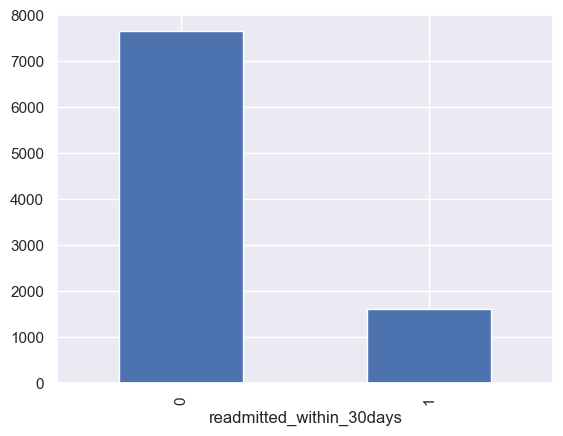

In [7]:
train_df.drop_duplicates(subset=["id"], keep="first")["readmitted_within_30days"].value_counts().plot.bar()

In [8]:
print(f"Type of EHR data: {type(ehr_data)}")
print(ehr_data.keys())

Type of EHR data: <class 'dict'>
dict_keys(['feat_dict', 'feature_cols', 'cat_idxs', 'cat_dims', 'demo_cols', 'icd_cols', 'lab_cols', 'med_cols'])


In [9]:
# Here we check the first key: feat_dict
# It contains the features of each 
print(type(ehr_data["feat_dict"]))
print(len(ehr_data["feat_dict"].keys()))
print(list(ehr_data["feat_dict"].keys())[:5])

<class 'dict'>
14532
['10869829_25238191', '17910612_22301530', '16026764_21404901', '12347278_29852086', '18463717_24608289']


In [10]:
print(type(ehr_data["feat_dict"]["10869829_25238191"]))
print(ehr_data["feat_dict"]["10869829_25238191"].shape)
# For each admission, we have a matrix of shape (n_days, n_features) to represent its EHR feature,
# where n_days is the number of days in the admission, and n_features (171) is the number of features.

<class 'numpy.ndarray'>
(13, 171)


In [11]:
print(type(ehr_data["cat_idxs"]))
print(len(ehr_data["cat_idxs"]))
print(ehr_data["cat_idxs"][:])
# cat_idxs denote the indices of categorical features in the feature matrix.

<class 'list'>
38
[1, 2, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]


In [12]:
print(type(ehr_data["cat_dims"]))
print(len(ehr_data["cat_dims"]))
print(ehr_data["cat_dims"][:])
# cat_dims denote the feature dimension for each categorical feature.

<class 'list'>
38
[2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


The EHR data has 171 features, which can be divided into 4 groups:
1. demongraphic features (3)
2. ICD features (91)
3. Laboratory test results (36)
4. Medications (41)

In [13]:
print(type(ehr_data["demo_cols"]))
print(len(ehr_data["demo_cols"]))
print(ehr_data["demo_cols"])

<class 'list'>
3
['age', 'gender', 'ethnicity']


In [14]:
print(type(ehr_data["icd_cols"]))
print(len(ehr_data["icd_cols"]))
print(ehr_data["icd_cols"][:5])

<class 'list'>
91
['Y90-Y99', 'G30-G32', 'O85-O92', 'C60-C63', 'F40-F48']


In [15]:
print(type(ehr_data["lab_cols"]))
print(len(ehr_data["lab_cols"]))
print(ehr_data["lab_cols"][:])

<class 'list'>
36
['Creatinine Blood', 'Sodium Blood', 'pO2 Blood', 'Basophils Other Body Fluid', 'Basophils Pleural', 'Lactate Blood', 'Anion Gap Blood', 'Eosinophils Joint Fluid', 'Hemoglobin Blood', 'Chloride Blood', 'Eosinophils Ascites', 'pH Urine', 'Calcium, Total Blood', 'Lymphocytes Ascites', 'Eosinophils Other Body Fluid', 'Eosinophils Blood', 'Lymphocytes Blood', 'Basophils Joint Fluid', 'Hematocrit Blood', 'Potassium Blood', 'H Blood', 'Monocytes Blood', 'Eosinophils Pleural', 'Troponin T Blood', 'Neutrophils Blood', 'Bicarbonate Blood', 'Basophils Blood', 'Glucose Blood', 'Basophils Ascites', 'pH Blood', 'Platelet Count Blood', 'Lymphocytes Other Body Fluid', 'Monocytes Ascites', 'Lymphocytes Joint Fluid', 'Lymphocytes Pleural', 'pCO2 Blood']


In [16]:
print(type(ehr_data["med_cols"]))
print(len(ehr_data["med_cols"]))
print(ehr_data["med_cols"][:])

<class 'list'>
41
['UNCLASSIFIED DRUG PRODUCTS', 'HORMONES', 'THYROID PREPS', 'SMOKING DETERRENTS', 'ANTIFUNGALS', 'DIURETICS', 'DIAGNOSTIC', 'ANTICOAGULANTS', 'ANTIPARKINSON DRUGS', 'EENT PREPS', 'ANALGESICS', 'ANTIPARASITICS', 'CNS DRUGS', 'ANTIHISTAMINES', 'ANTIPLATELET DRUGS', 'PSYCHOTHERAPEUTIC DRUGS', 'ANTIARTHRITICS', 'CONTRACEPTIVES', 'SKIN PREPS', 'ANTINEOPLASTICS', 'ELECT/CALORIC/H2O', 'CARDIOVASCULAR', 'COUGH/COLD PREPARATIONS', 'MUSCLE RELAXANTS', 'ANTIINFECTIVES/MISCELLANEOUS', 'GASTROINTESTINAL', 'IMMUNOSUPPRESSANTS', 'ANTIVIRALS', 'BLOOD', 'ANTIASTHMATICS', 'CARDIAC DRUGS', 'PRE-NATAL VITAMINS', 'ANESTHETICS', 'ANTIBIOTICS', 'ANTIHYPERGLYCEMICS', 'ANTIINFLAM.TUMOR NECROSIS FACTOR INHIBITING AGENTS', 'SEDATIVE/HYPNOTICS', 'ANTIDOTES', 'AUTONOMIC DRUGS', 'VITAMINS', 'BIOLOGICALS']


In [17]:
# Here we create a dataframe to show the features of the admission: 10869829_25238191
sample_df = pd.DataFrame(
    ehr_data["feat_dict"]["10869829_25238191"].astype(np.float32),
    columns=ehr_data["demo_cols"] + ehr_data["icd_cols"] + ehr_data["lab_cols"] + ehr_data["med_cols"]
)
sample_df

,age,gender,ethnicity,Y90-Y99,G30-G32,O85-O92,C60-C63,F40-F48,M80-M85,R00-R09,...,PRE-NATAL VITAMINS,ANESTHETICS,ANTIBIOTICS,ANTIHYPERGLYCEMICS,ANTIINFLAM.TUMOR NECROSIS FACTOR INHIBITING AGENTS,SEDATIVE/HYPNOTICS,ANTIDOTES,AUTONOMIC DRUGS,VITAMINS,BIOLOGICALS
0,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
1,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
2,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
3,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
4,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
5,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
6,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
7,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
8,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
9,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0


#### 4. Start point

As a starting point, we can create a dataset using only the features from the last day. However, incorporating temporal information will likely improve performance.

In [18]:
X_train = []
for idx, row in train_df.iterrows():
    X_train.append(ehr_data["feat_dict"][row["id"]][-1])
X_train = np.array(X_train)
print(X_train.shape)

X_val = []
for idx, row in val_df.iterrows():
    X_val.append(ehr_data["feat_dict"][row["id"]][-1])
X_val = np.array(X_val)
print(X_val.shape)

(55941, 171)
(13598, 171)


#### After-Class Exercise

1. Examine the standard deviation of the features in the dataset. Do all features contain useful information?
2. Analyze the correlation between input features and labels.
3. Develop classifiers (e.g., logistic regression, naive Bayes, etc.) for the task.
4. Normalize your features and apply the classifier again.